C:\Users\oskar\AppData\Local\Temp\ipykernel_34824\4135055730.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_0 = df_0.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
C:\Users\oskar\AppData\Local\Temp\ipykernel_34824\4135055730.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_1 = df_1.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
C:\Users\oskar\AppData\Local\Temp\ipykernel_34824\4135055730.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current 

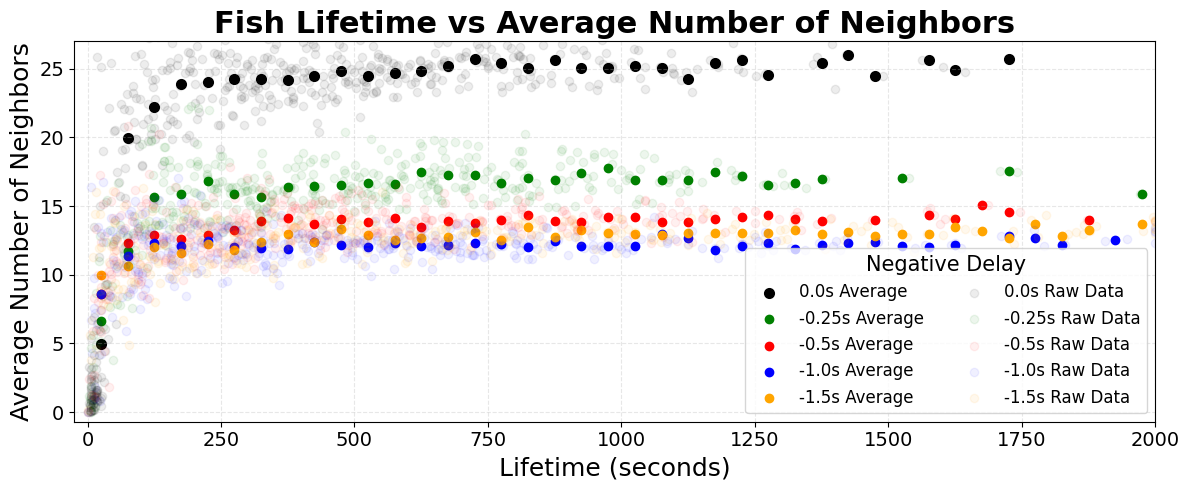

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from CSV files
df_0 = pd.read_csv('Data_1312/fish_data_0_1312.csv')
df_1 = pd.read_csv('Data_1312/fish_data_1_1312.csv')
df_05 = pd.read_csv('Data_1312/fish_data_05_1312.csv')
df_025 = pd.read_csv('Data_1312/fish_data_025_1312.csv')
df_15 = pd.read_csv('Data_1312/fish_data_15_1312.csv')
max_lifetime = np.array([df_1['Lifetime'].max(), df_05['Lifetime'].max(), df_025['Lifetime'].max(),df_15['Lifetime'].max()]).max()

# Define bin edges: 0, 100, 200, ..., up to the maximum 'Lifetime'
bins = np.arange(0, max_lifetime + 500, 500)  # e.g., [0, 100, 200, ..., max_lifetime]

# Assign bins to 'Lifetime' for each dataset
df_0['Lifetime_Bin'] = pd.cut(df_0['Lifetime'], bins=bins, right=False)
df_1['Lifetime_Bin'] = pd.cut(df_1['Lifetime'], bins=bins, right=False)
df_05['Lifetime_Bin'] = pd.cut(df_05['Lifetime'], bins=bins, right=False)
df_025['Lifetime_Bin'] = pd.cut(df_025['Lifetime'], bins=bins, right=False)
df_15['Lifetime_Bin'] = pd.cut(df_15['Lifetime'], bins=bins, right=False)
# Aggregate mean 'Average Neighbors' per 'Lifetime_Bin'+
binned_0 = df_0.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
binned_1 = df_1.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
binned_05 = df_05.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
binned_025 = df_025.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
binned_15 = df_15.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
# Calculate bin midpoints for plotting
def bin_midpoint(bin_interval):
    return bin_interval.left + (bin_interval.right - bin_interval.left) / 2
binned_0['Lifetime_Mid'] = binned_0['Lifetime_Bin'].apply(bin_midpoint).astype(float)
binned_1['Lifetime_Mid'] = binned_1['Lifetime_Bin'].apply(bin_midpoint).astype(float)
binned_05['Lifetime_Mid'] = binned_05['Lifetime_Bin'].apply(bin_midpoint).astype(float)
binned_025['Lifetime_Mid'] = binned_025['Lifetime_Bin'].apply(bin_midpoint).astype(float)
binned_15['Lifetime_Mid'] = binned_15['Lifetime_Bin'].apply(bin_midpoint).astype(float)
# Create the scatter and line plot
plt.figure(figsize=(12, 5))
# Line plot of binned averages
plt.scatter(binned_0['Lifetime_Mid'].div(10), binned_0['Average Neighbors'], color='black', label='0.0s Average', linewidth=2)
plt.scatter(binned_025['Lifetime_Mid'].div(10), binned_025['Average Neighbors'], color='green', marker='o', label='-0.25s Average')
plt.scatter(binned_05['Lifetime_Mid'].div(10), binned_05['Average Neighbors'], color='red', marker='o', label='-0.5s Average')
plt.scatter(binned_1['Lifetime_Mid'].div(10), binned_1['Average Neighbors'], color='blue', marker='o', label='-1.0s Average')
plt.scatter(binned_15['Lifetime_Mid'].div(10), binned_15['Average Neighbors'], color='orange', marker='o', label='-1.5s Average')

# Scatter plot of raw data
plt.scatter(df_0['Lifetime'].div(10), df_0['Average Neighbors'], color='black', alpha=0.07, label='0.0s Raw Data')
plt.scatter(df_025['Lifetime'].div(10), df_025['Average Neighbors'], color='green', alpha=0.07, label='-0.25s Raw Data')
plt.scatter(df_05['Lifetime'].div(10), df_05['Average Neighbors'], color='red', alpha=0.06, label='-0.5s Raw Data')
plt.scatter(df_1['Lifetime'].div(10), df_1['Average Neighbors'], color='blue', alpha=0.06, label='-1.0s Raw Data')
plt.scatter(df_15['Lifetime'].div(10), df_15['Average Neighbors'], color='orange', alpha=0.07, label='-1.5s Raw Data')

# Add titles and labels
plt.title('Fish Lifetime vs Average Number of Neighbors', fontsize=22, fontweight='bold')
plt.xlabel('Lifetime (seconds)', fontsize=18)
plt.ylabel('Average Number of Neighbors', fontsize=18)

# Customize ticks and grid
plt.xticks(fontsize=14)
plt.yticks([0,5,10,15,20,25],fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(0, max_lifetime)
plt.ylim(-0.7,27)

plt.xlim(-25,2000)
# Add legend
plt.legend(ncol=2, title='Negative Delay', title_fontsize=15, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()